##**Crash course in Causality**

Name - Amrutha Sai Edara

NUID - 002776773

###**What is causality?**
Causality seeks to identify the relationships where one variable (cause) directly affects another (effect). The concept of causality in machine learning is deeply intertwined with the idea of understanding and modeling the cause-and-effect relationships in data, beyond the simple correlations often captured by traditional machine learning models.

###**What is need for Causality and how is it different from Correlation.**

* Informed Decision Making: Causality provides actionable insights for making effective decisions in policy-making, business, healthcare, and other areas.

* Understanding Mechanisms: It goes beyond correlation to uncover why relationships between variables exist, which is essential in scientific research and theory development.

* Effective Interventions: In fields like healthcare and public policy, causality is vital for designing interventions and treatments that truly address the root cause of issues.

* Risk Management: It helps in identifying and mitigating risks by understanding the true cause-and-effect relationships, preventing actions based on false correlations

**Correlation** refers to a statistical relationship or association between two or more variables. When one variable changes, there is a tendency for the other variable to change in a predictable manner.

**Key Differences between causality and correlation**

* **Implication of Relationship:**

  Correlation: Simply shows that two variables are related.

  Causality: Indicates that one variable actually affects the other.

* **Method of Determination:**

  Correlation: Can be determined using statistical correlation coefficients.

  Causality: Requires more rigorous experimentation or statistical analysis to establish.

* **Interpretation:**

  Correlation: Should be interpreted cautiously; a high correlation does not necessarily mean that there is a causal relationship.

  Causality: Provides a basis for understanding the mechanism and effect of changes in one variable on another.



##**Key concepts in understanding Causality or Causal Inference**

* **Counterfactuals:** These are the hypothetical scenarios for what would have happened under different circumstances.

  Example: In a medical study, for a patient who received treatment A and recovered, the counterfactual question is: "What would have happened if the same patient had received treatment B instead?"

* **Intervention:** Changing a variable to observe the effect on another (like in controlled experiments).

* **Potential Outcomes Framework:** These are also known as Rubin causal model. The Potential Outcomes Framework involves considering the possible outcomes (or potential outcomes) for each individual in a study under different scenarios or treatments

* **Cause and Effect:** A cause is something that produces an effect, change, or result.

* **Correlation vs. Causation:** It's important to distinguish between correlation (when two variables move together) and causation (where one variable directly influences another). Just because two variables are correlated does not necessarily mean one causes the other.

* **Confounding Variables:** These are extraneous variables that can influence both the cause and effect, leading to false causal conclusions if not properly controlled or accounted for.

* **Causal Diagrams and Models:** Graphical representations like Directed Acyclic Graphs (DAGs) are used to illustrate and analyze causal relationships, helping to identify potential confounding variables and causal paths.






##**Causal Discovery**

* identifying causal relationships within a set of variables, typically from observational data.
* Unlike causal inference, which usually tests a specific causal hypothesis, causal discovery aims to uncover the underlying causal structure of the data without prior assumptions about which variables are causes and which are effects


##**Causal Inference:**

* It involves methods to deduce causality from data, often observational data where controlled experiments are not possible.

* Techniques include **instrumental variables, propensity score matching, and difference-in-differences methods.**

### **Some of the known techniques in Causal Inference:**

**Randomized Controlled Trials (RCTs):**

* In an RCT, subjects are randomly assigned to either a treatment group or a control group.Randomization ensures that the groups are comparable, thereby isolating the effect of the treatment.

**Propensity Score Matching:**

* Used in observational studies to mimic randomization. Subjects are matched based on their propensity scores, which represent the probability of receiving the treatment given their observed characteristics.

**Instrumental Variables (IV):**

* IVs are used when randomization is not possible and when there is concern about unmeasured confounding variables. An instrumental variable is correlated with the treatment but not directly with the outcome, except through its effect on the treatment.


**Regression Discontinuity Design (RDD):**

* Applied when the treatment is assigned based on a cutoff in an assignment variable. RDD compares outcomes just above and below the cutoff to estimate the causal effect.

**Difference-in-Differences (DiD):**

* Compares the changes in outcomes over time between a group that receives the treatment and a group that does not.
Useful for evaluating the impact of policy changes or interventions.

**Granger Causality:**

* Used in time series analysis. Tests whether past values of one variable can predict the future values of another variable, suggesting a potential causal relationship.

**Causal Diagrams and Graphical Models:**

* Utilize diagrams (like Directed Acyclic Graphs, DAGs) to represent and reason about causal relationships.
Help in identifying potential confounders and causal pathways.



##**Scenario** - the probability of recovery from a given disease is larger when people take a given pill than when they do not.

* **Treatment Group:** This group consists of individuals who are given the pill in question. In our scenario, this group receives the medication that is hypothesized to improve recovery rates from the disease. The key aspect of this group is that they are actively receiving the intervention being tested.

* **Control Group:** Conversely, the control group consists of individuals who do not receive the experimental treatment. In some cases, they might receive a placebo, which is a substance with no therapeutic effect, to mimic the experience of taking the pill. The control group serves as a benchmark to compare against the treatment group, helping to isolate the effect of the pill.


In a well-designed experiment, both groups should be as identical as possible in every aspect except for the treatment itself. This similarity is crucial to ensure that any differences in outcomes between the two groups can be attributed to the treatment rather than other variables.









####Let's take an example, to perform difference-in-difference for obtaining causality.

* The difference-in-differences method is a quasi-experimental approach that compares the changes in outcomes over time between a population enrolled in a program (the treatment group) and a population that is not (the comparison group).

**Example 1:**

Below taken dataset depicts the estimate of the causal effect of an increase in the state minimum wage on the employment.

The same DID result can be obtained via regression, which allows adding control variables if needed:

**y=β0+β1∗g+β2∗t+β3∗(t∗g)+ε**

* g is 0 for the control group and 1 for the treatment group

* t is 0 for before and 1 for after



In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Amrutha1103/causality/main/employment.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   state          384 non-null    int64  
 1   total_emp_feb  384 non-null    float64
 2   total_emp_nov  384 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 9.1 KB


In [ ]:
df.head()

,state,total_emp_feb,total_emp_nov
0,0,40.50,24.0
1,0,13.75,11.5
2,0,8.50,10.5
3,0,34.00,20.0
4,0,24.00,35.5


In [ ]:
df.groupby('state').mean()

,total_emp_feb,total_emp_nov
state,,
0,23.380000,21.096667
1,20.430583,20.897249


In [ ]:
# check by calculating the mean for each group directly
# 0 PA control group, 1 NJ treatment group

mean_emp_pa_before = df.groupby('state').mean().iloc[0, 0]
mean_emp_pa_after = df.groupby('state').mean().iloc[0, 1]
mean_emp_nj_before = df.groupby('state').mean().iloc[1, 0]
mean_emp_nj_after = df.groupby('state').mean().iloc[1, 1]

print(f'mean PA employment before: {mean_emp_pa_before:.2f}')
print(f'mean PA employment after: {mean_emp_pa_after:.2f}')
print(f'mean NJ employment before: {mean_emp_nj_before:.2f}')
print(f'mean NJ employment after: {mean_emp_nj_after:.2f}')

pa_diff = mean_emp_pa_after - mean_emp_pa_before
nj_diff = mean_emp_nj_after - mean_emp_nj_before
did = nj_diff - pa_diff

print(f'DID in mean employment is {did:.2f}')

mean PA employment before: 23.38
mean PA employment after: 21.10
mean NJ employment before: 20.43
mean NJ employment after: 20.90
DID in mean employment is 2.75


In [ ]:
# group g: 0 control group (PA), 1 treatment group (NJ)
# t: 0 before treatment (min wage raise), 1 after treatment
# gt: interaction of g * t

# data before the treatment
df_before = df[['total_emp_feb', 'state']]
df_before['t'] = 0
df_before.columns = ['total_emp', 'g', 't']

# data after the treatment
df_after = df[['total_emp_nov', 'state']]
df_after['t'] = 1
df_after.columns = ['total_emp', 'g', 't']

# data for regression
df_reg = pd.concat([df_before, df_after])

# create the interaction
df_reg['gt'] = df_reg.g * df_reg.t

df_reg

,total_emp,g,t,gt
0,40.50,0,0,0
1,13.75,0,0,0
2,8.50,0,0,0
3,34.00,0,0,0
4,24.00,0,0,0
...,...,...,...,...
379,23.75,1,1,1
380,17.50,1,1,1
381,20.50,1,1,1
382,20.50,1,1,1


In [ ]:
# regression via sklearn
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

X = df_reg[['g', 't', 'gt']]
y = df_reg.total_emp

lr.fit(X, y)
lr.coef_  # the coefficient for gt is the DID, which is 2.75

array([-2.94941748, -2.28333333,  2.75      ])

In [ ]:
# regression via statsmodels
# result is not significant

from statsmodels.formula.api import ols
ols = ols('total_emp ~ g + t + gt', data=df_reg).fit()
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:              total_emp   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.947
Date:                Mon, 04 Dec 2023   Prob (F-statistic):              0.121
Time:                        00:50:07   Log-Likelihood:                -2817.6
No. Observations:                 768   AIC:                             5643.
Df Residuals:                     764   BIC:                             5662.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.3800      1.098     21.288      0.0

Observation:

* The DiD estimator (interaction term) has a p-value of 0.113, indicating it's not statistically significant at the conventional 5% level.

* The R-squared value is 0.008, suggesting the model explains only a small portion of the variance in the employment data.

*  The F-statistic p-value is 0.121, meaning the model as a whole is not statistically significant.



#### Performing HC3 heteroskedasticity-robust standard errors to check the performance of the variables



In [ ]:
import statsmodels.api as sm

model = sm.OLS(y, X).fit(cov_type='HC3')  # Using heteroskedasticity-robust standard errors
print(model.summary())


                                 OLS Regression Results                                
Dep. Variable:              total_emp   R-squared (uncentered):                   0.730
Model:                            OLS   Adj. R-squared (uncentered):              0.729
Method:                 Least Squares   F-statistic:                              1171.
Date:                Mon, 04 Dec 2023   Prob (F-statistic):                   2.38e-285
Time:                        01:23:23   Log-Likelihood:                         -2996.5
No. Observations:                 768   AIC:                                      5999.
Df Residuals:                     765   BIC:                                      6013.
Df Model:                           3                                                  
Covariance Type:                  HC3                                                  
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------

Observations:

* The coefficient for the interaction term (gt) is -20.63, and it is highly statistically significant (p < 0.001). This is the most critical finding in a DiD analysis as it suggests that the policy or treatment being studied has a significant impact on employment. The negative value indicates that the treatment (e.g., an increase in minimum wage) is associated with a decrease in employment in the treatment group relative to the control group.

* The R-squared value of 0.730 indicates that the model explains about 73% of the variability in the employment data, which is a strong fit for a regression model.

* The use of HC3 robust standard errors addresses the issue of heteroskedasticity, strengthening the reliability of the statistical significance tests.

DiD analysis provides robust evidence that the treatment or policy in question has a significant negative effect on employment.


##Example2:

In this notebook, I have taken an example to understand the concept of **"*counterfactuals*"** in causality.

**Counterfactuals** provide the solution or changes in prediction to “What if” cases by showing feature-perturbed versions of the same cases. If X is an independent variable and Y is a dependent variable, counterfactual shows the effect on Y due to small changes in X. Also, it helps to calculate,what changes need to be done in X if the outcome Y is changed to Y'.

I have taken the **MNIST** dataset to perform analysis to understand counterfactuals. MNIST dataset is a large database of handwritten digits which consists of 70,000 images of handwritten digits (0 through 9). Each image is a 28x28 pixel grayscale representation of a digit.




In [ ]:
#Counterfactual Instance on MNIST
!pip install alibi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.2/524.2 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 9.7 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
tf.get_logger().setLevel(40) # suppress deprecation messages
tf.compat.v1.disable_v2_behavior() # disable TF2 behaviour as alibi code still relies on TF1 constructs
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D, Input
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.utils import to_categorical
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
from time import time
from alibi.explainers import CounterFactual
print('TF version: ', tf.__version__)
print('Eager execution enabled: ', tf.executing_eagerly()) # False

TF version:  2.14.0
Eager execution enabled:  False


In [ ]:
from scipy.io import loadmat
mnist = loadmat("/mnist-original.mat")
mnist_data = mnist["data"].T
mnist_label = mnist["label"][0]


11490434/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28) y_train shape: (60000,)


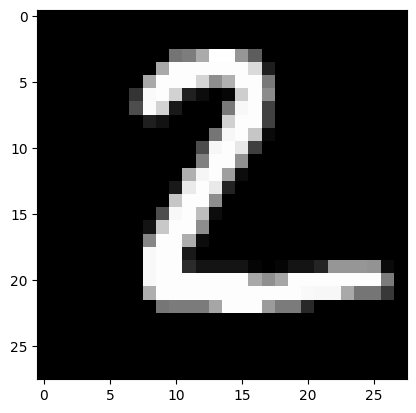

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print('x_train shape:', x_train.shape, 'y_train shape:', y_train.shape)
plt.gray()
plt.imshow(x_test[1]);

In [ ]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
x_train = np.reshape(x_train, x_train.shape + (1,))
x_test = np.reshape(x_test, x_test.shape + (1,))
print('x_train shape:', x_train.shape, 'x_test shape:', x_test.shape)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print('y_train shape:', y_train.shape, 'y_test shape:', y_test.shape)


x_train shape: (60000, 28, 28, 1) x_test shape: (10000, 28, 28, 1)
y_train shape: (60000, 10) y_test shape: (10000, 10)


In [ ]:
xmin, xmax = -.5, .5
x_train = ((x_train - x_train.min()) / (x_train.max() - x_train.min())) * (xmax - xmin) + xmin
x_test = ((x_test - x_test.min()) / (x_test.max() - x_test.min())) * (xmax - xmin) + xmin

In [ ]:
#define and train CNN model
def cnn_model():
    x_in = Input(shape=(28, 28, 1))
    x = Conv2D(filters=64, kernel_size=2, padding='same', activation='relu')(x_in)
    x = MaxPooling2D(pool_size=2)(x)
    x = Dropout(0.3)(x)

    x = Conv2D(filters=32, kernel_size=2, padding='same', activation='relu')(x)
    x = MaxPooling2D(pool_size=2)(x)
    x = Dropout(0.3)(x)

    x = Flatten()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    x_out = Dense(10, activation='softmax')(x)
    cnn = Model(inputs=x_in, outputs=x_out)
    cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    return cnn

In [ ]:
cnn = cnn_model()
cnn.summary()
cnn.fit(x_train, y_train, batch_size=64, epochs=3, verbose=0)
cnn.save('mnist_cnn.h5')

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 64)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                        

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
#Calculate the error for evaluation of model
cnn = load_model('mnist_cnn.h5')
score = cnn.evaluate(x_test, y_test, verbose=0)
print('Test accuracy: ', score[1])

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


Test accuracy:  0.9881


Since the accuracy is 98%, the model is good.

* Since counterfactual is a local explanation method, we focus on one particular instance i.e. index 0 of test data which is an image of handwritten 7 as shown below.

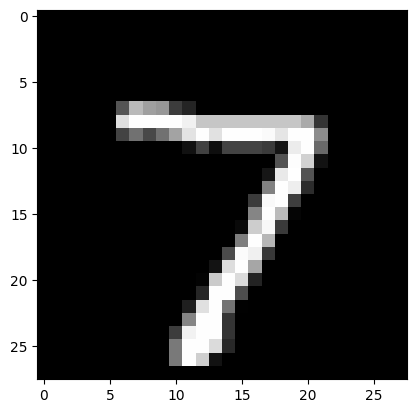

In [ ]:
X = x_test[0].reshape((1,) + x_test[0].shape)
plt.imshow(X.reshape(28, 28));

# Generate counterfactuals

**Counterfactual parameters -**

* target_proba: This is the probability required for the returned target class after applying counterfactual.

* tol: the tolerance within the target_proba, this is used to specify a range of acceptable predicted probability values for flexibility in target_proba.

* target_class: desired target class for the returned counterfactual instance.

* feature_range: feature-wise min and max values for the perturbed instance.

* max_iter, lam_init, max_lam_steps, learning_rate_init are all mathematical parameters used for the method.

* learning_rate_init: initial learning rate

* lam_init: initial value of the hyperparameter λ.

* max_lam_steps: the number of steps (outer loops) to search for with a different value of λ.

In [ ]:
shape = (1,) + x_train.shape[1:] #reshaping according to batch dimension, which is here 1, so 1 column is added.
target_proba = 1.0
tol = 0.01 # tolerance - want counterfactuals with p(class)>0.99
target_class = 'other' # any class other than the class of the test instance (here 7).
max_iter = 1000
lam_init = 1e-1
max_lam_steps = 10
learning_rate_init = 0.1
feature_range = (x_train.min(),x_train.max())

In [ ]:
# initialize explainer
cf = CounterFactual(cnn, shape=shape, target_proba=target_proba, tol=tol,
                    target_class=target_class, max_iter=max_iter, lam_init=lam_init,
                    max_lam_steps=max_lam_steps, learning_rate_init=learning_rate_init,
                    feature_range=feature_range)

start_time = time()
explanation = cf.explain(X)
print('Explanation took {:.3f} sec'.format(time() - start_time))

/usr/local/lib/python3.10/dist-packages/alibi/explainers/counterfactual.py:71: FutureWarning: The class name `CounterFactual` is deprecated, please use `Counterfactual`.
  warnings.warn(warning_msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Explanation took 16.665 sec


Counterfactual prediction: 9 with probability 0.990168571472168


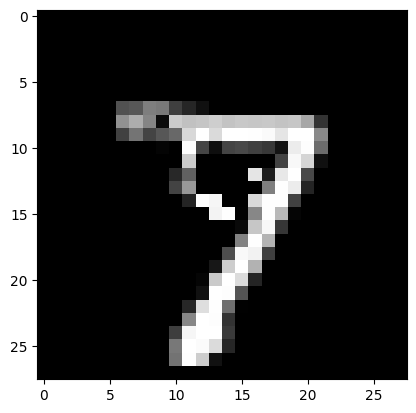

In [ ]:
pred_class = explanation.cf['class']
proba = explanation.cf['proba'][0][pred_class]

print(f'Counterfactual prediction: {pred_class} with probability {proba}')
plt.imshow(explanation.cf['X'].reshape(28, 28));

A counterfactual explanation of a prediction describes the smallest change to the feature values that changes the prediction to a predefined output. Here, the counterfactual starting from a 9, makes changes in the pixels and moves towards the closest class in the data, that is in this case a 7. As required, the probability of the returned counterfactual is 0.99 which is quite high.

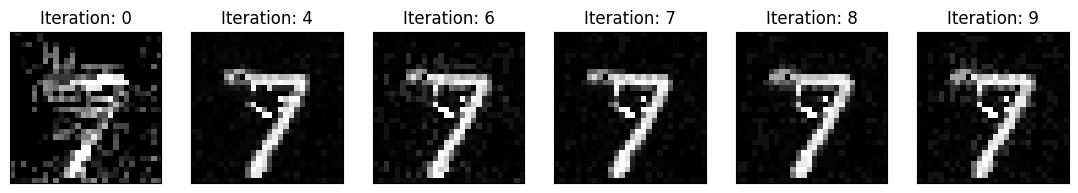

In [ ]:
n_cfs = np.array([len(explanation.all[iter_cf]) for iter_cf in range(max_lam_steps)])
examples = {}
for ix, n in enumerate(n_cfs):
    if n>0:
        examples[ix] = {'ix': ix, 'lambda': explanation.all[ix][0]['lambda'],
                       'X': explanation.all[ix][0]['X']}
columns = len(examples) + 1
rows = 1

fig = plt.figure(figsize=(16,6))

for i, key in enumerate(examples.keys()):
    ax = plt.subplot(rows, columns, i+1)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.imshow(examples[key]['X'].reshape(28,28))
    plt.title(f'Iteration: {key}')

The transformation of 7 to 2 over several iterations is shown in the above image.

Now, we have specified the target class as 1 which means that for the outcome of model prediction to be 1, what are the changes in features(pixels here) required.

In [ ]:
target_class = 1

cf = CounterFactual(cnn, shape=shape, target_proba=target_proba, tol=tol,
                    target_class=target_class, max_iter=max_iter, lam_init=lam_init,
                    max_lam_steps=max_lam_steps, learning_rate_init=learning_rate_init,
                    feature_range=feature_range)

explanation = start_time = time()
explanation = cf.explain(X)
print('Explanation took {:.3f} sec'.format(time() - start_time))

Explanation took 11.261 sec


Counterfactual prediction: 1 with probability 0.9991394281387329


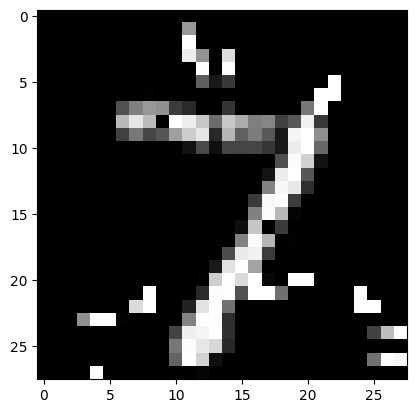

In [ ]:
pred_class = explanation.cf['class']
proba = explanation.cf['proba'][0][pred_class]

print(f'Counterfactual prediction: {pred_class} with probability {proba}')
plt.imshow(explanation.cf['X'].reshape(28, 28));

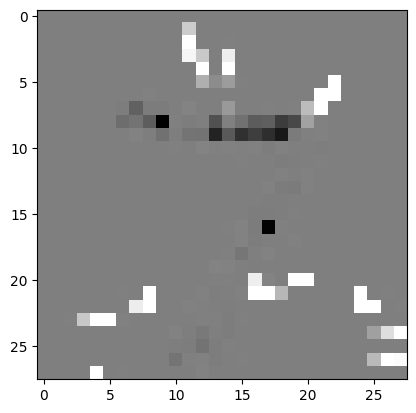

In [ ]:
plt.imshow((explanation.cf['X'] - X).reshape(28, 28));

The above image shows the difference between the counterfactual and the original instance. This helps in concluding that the counterfactual is removing the top part of the 7 to make to result in a prediction of 1 which is correct as the horizontal line when cut from 7 gives a slanting 1.

### EXAMPLE 3- To understand causality and countrtfactuals

### Granger Causality Test

This dataset contains weather data collected in the city of Delhi from the period of 4 years (from 2013 to 2017).

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
file_path1 = 'https://raw.githubusercontent.com/Amrutha1103/causality/main/DailyDelhiClimateTest.csv'  # Change this to the path of your first file
file_path2 = 'https://raw.githubusercontent.com/Amrutha1103/causality/main/DailyDelhiClimateTrain.csv'

import pandas as pd

data1 = pd.read_csv(file_path1)
data2 = pd.read_csv(file_path2)


####Data Visualization

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/Amrutha1103/causality/main/DailyDelhiClimateTrain.csv")
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [ ]:
print("Numer of missin values in our temperature column: ", df.meantemp.isnull().sum())

Numer of missin values in our temperature column:  0


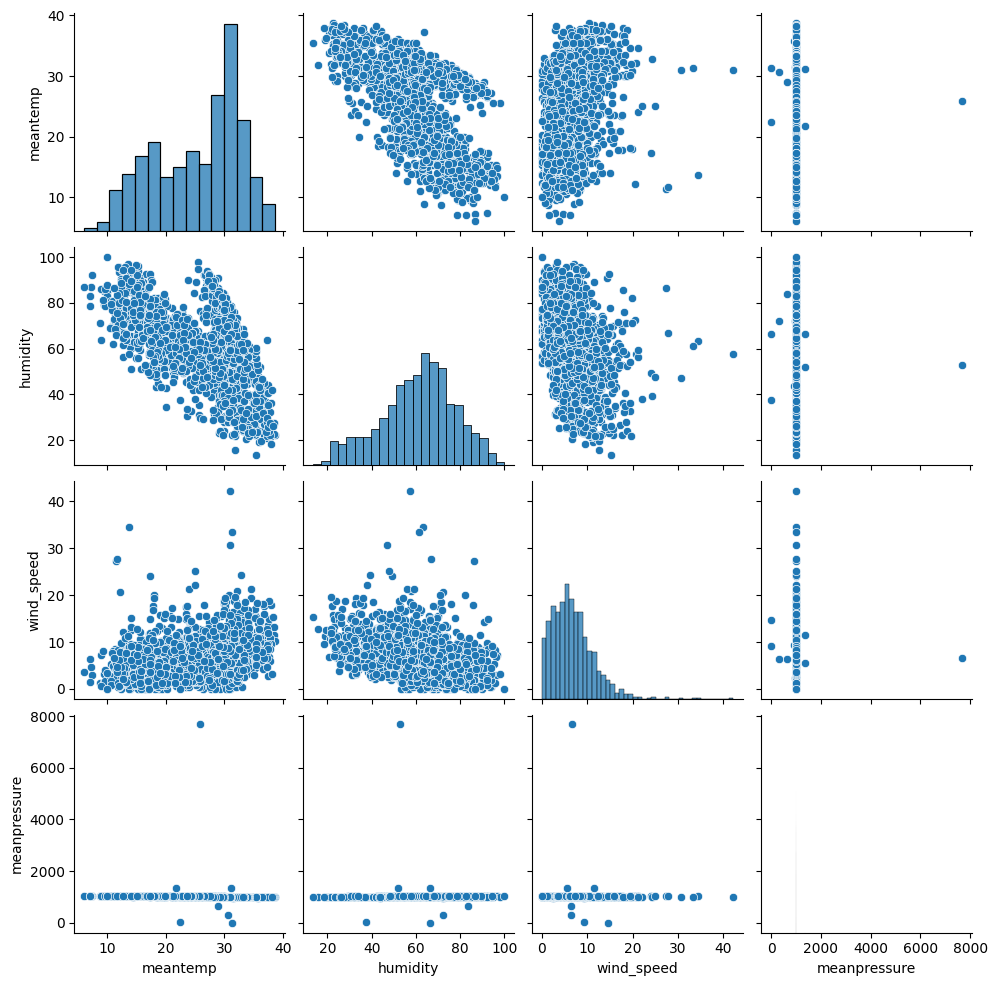

In [ ]:
sns.pairplot(df)

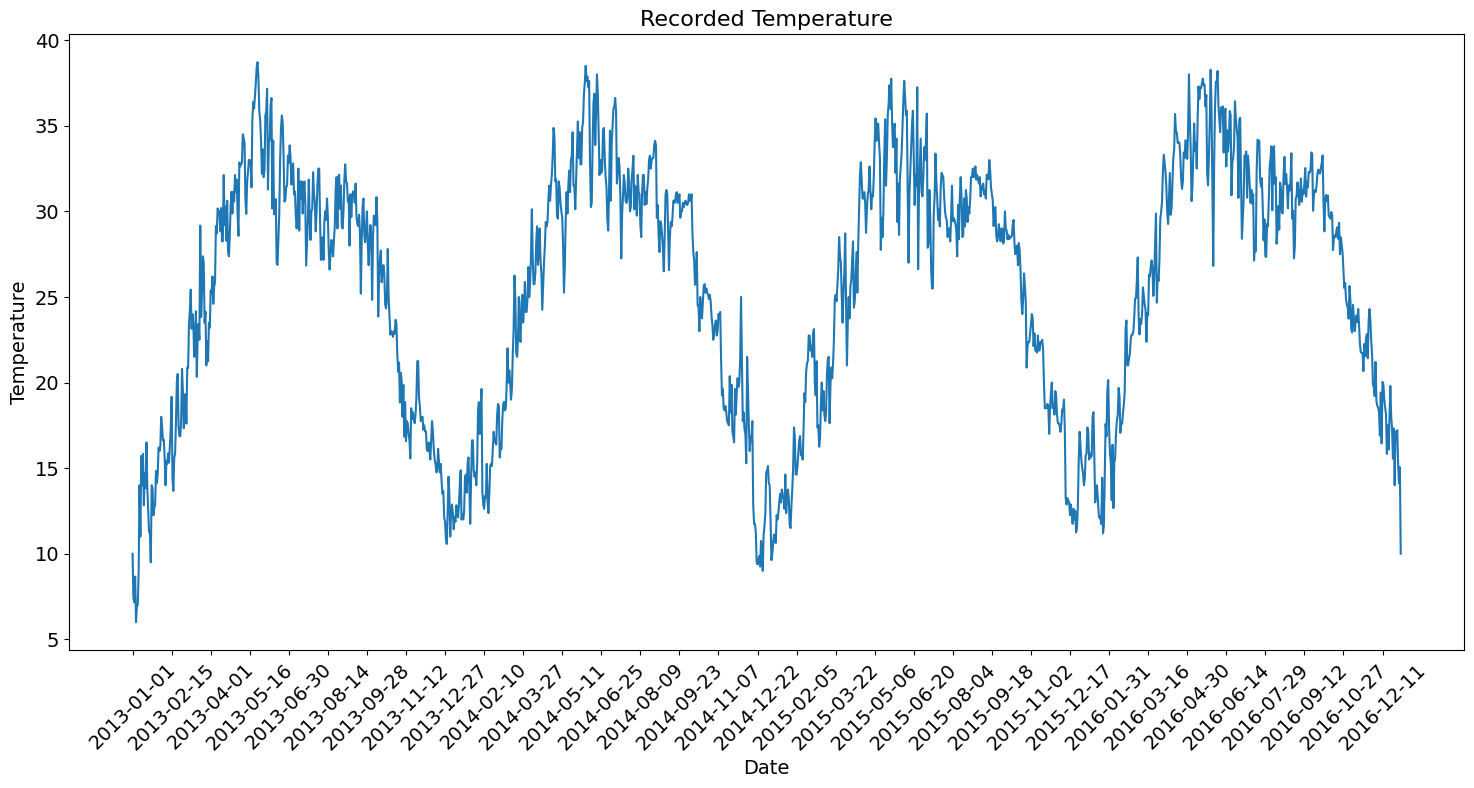

In [ ]:
plt.figure(figsize=(18, 8))
plt.plot(df.date, df['meantemp'])
plt.xlabel("Date", fontsize=14)
plt.ylabel("Temperature", fontsize=14)
plt.xticks(np.arange(0, len(df.date)+1, 45), rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.title("Recorded Temperature", fontsize=16)
plt.show()

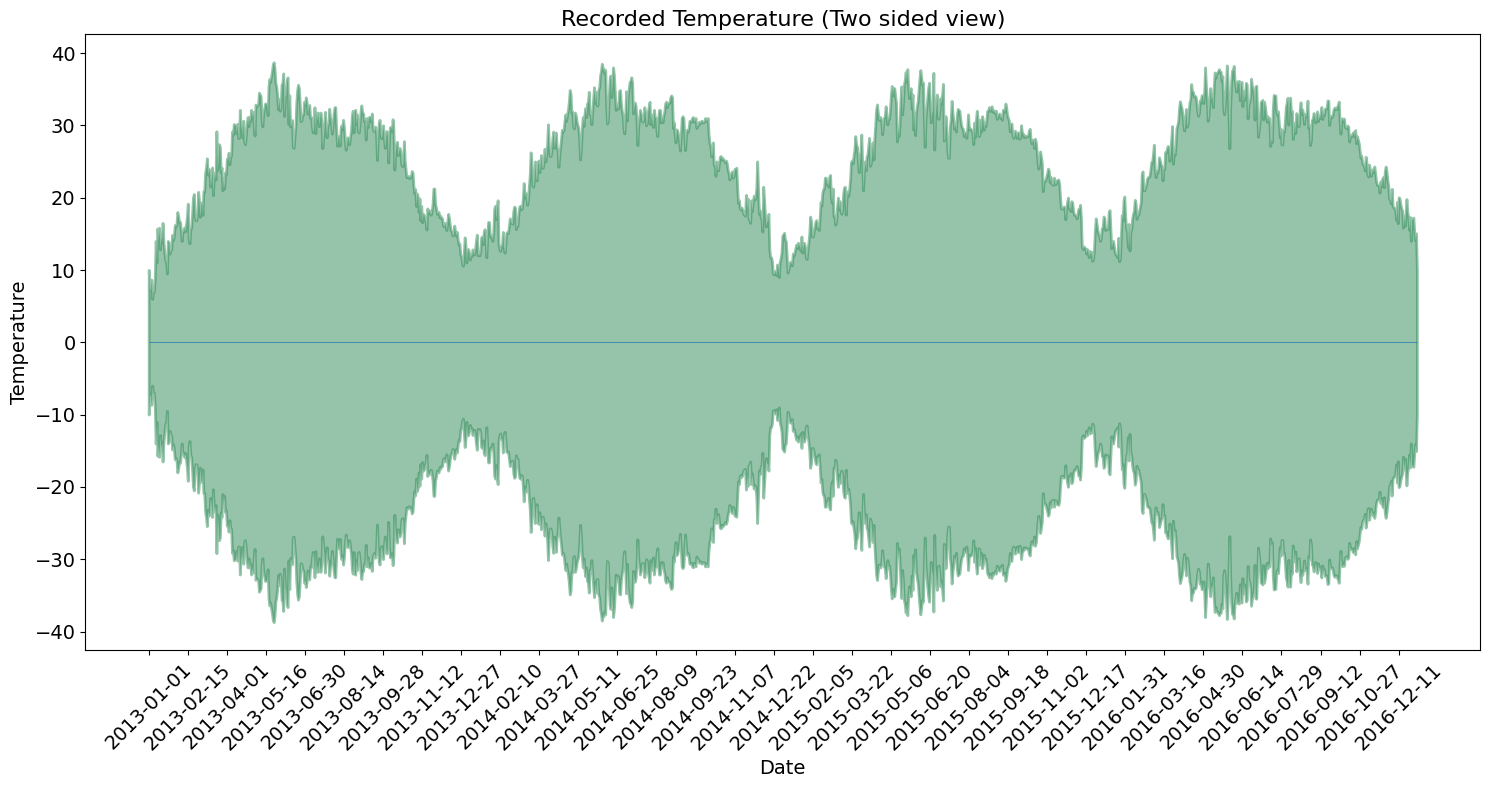

In [ ]:
plt.figure(figsize=(18, 8))
plt.fill_between(df.date, y1=df['meantemp'], y2=-df['meantemp'], alpha=0.5, linewidth=2, color='seagreen')
plt.hlines(y=0, xmin=np.min(df.date), xmax=np.max(df.date), linewidth=.5)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Temperature", fontsize=14)
plt.xticks(np.arange(0, len(df.date)+1, 45), rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.title("Recorded Temperature (Two sided view)", fontsize=16)
plt.show()

Temperature Years on Record:  2013 2014 2015 2016


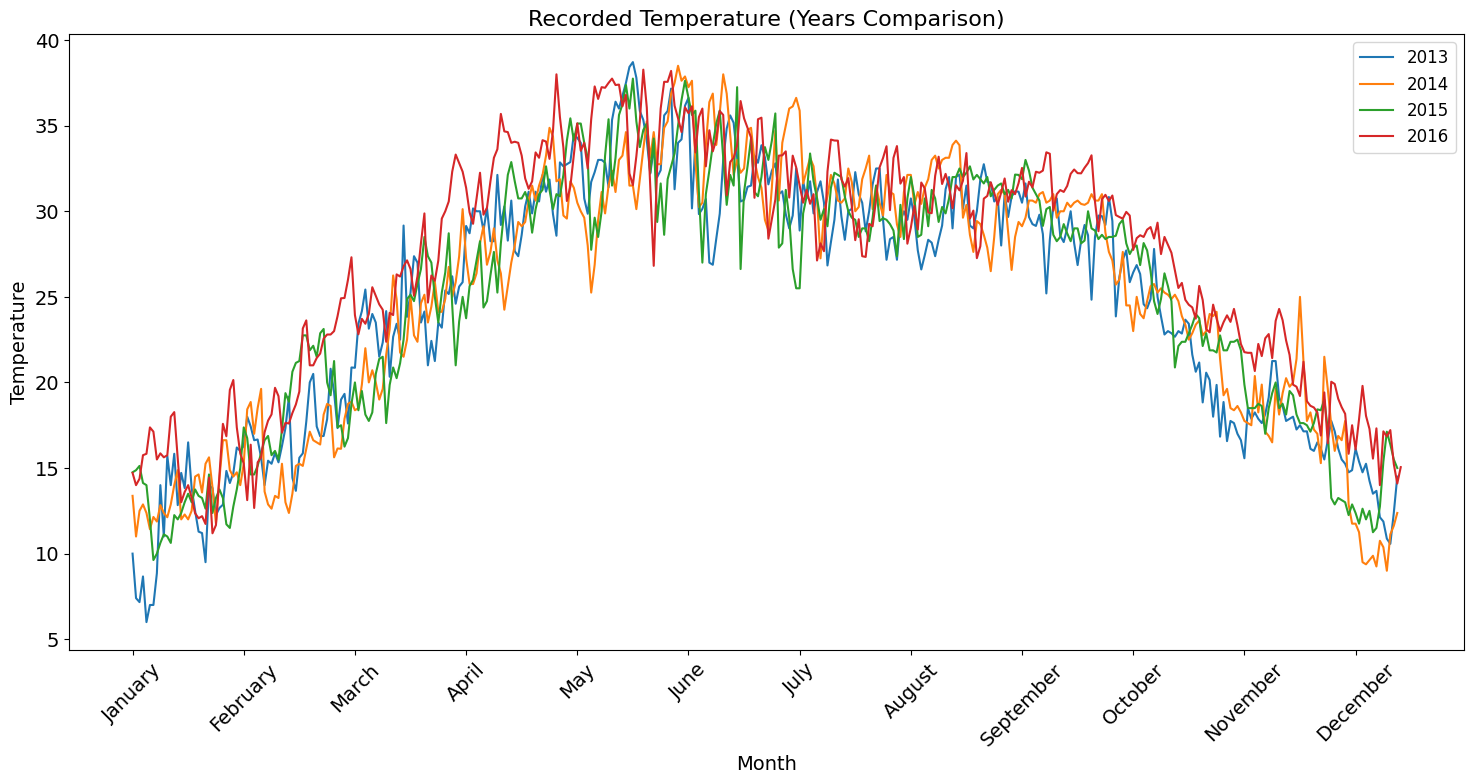

In [ ]:
plt.figure(figsize=(18, 8))
dates = pd.to_datetime(df.date.iloc[:-1])
print("Temperature Years on Record: ", *dates.dt.year.unique())
for i in dates.dt.year.unique():
    plt.plot(df['meantemp'].iloc[:-1][dates.dt.year==i].values, label=i)

plt.xlabel("Month", fontsize=14)
plt.ylabel("Temperature", fontsize=14)
plt.xticks(np.arange(0, 365, 32), labels=dates.dt.month_name().unique(), rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.title("Recorded Temperature (Years Comparison)", fontsize=16)
plt.legend(fontsize=12)
plt.show()

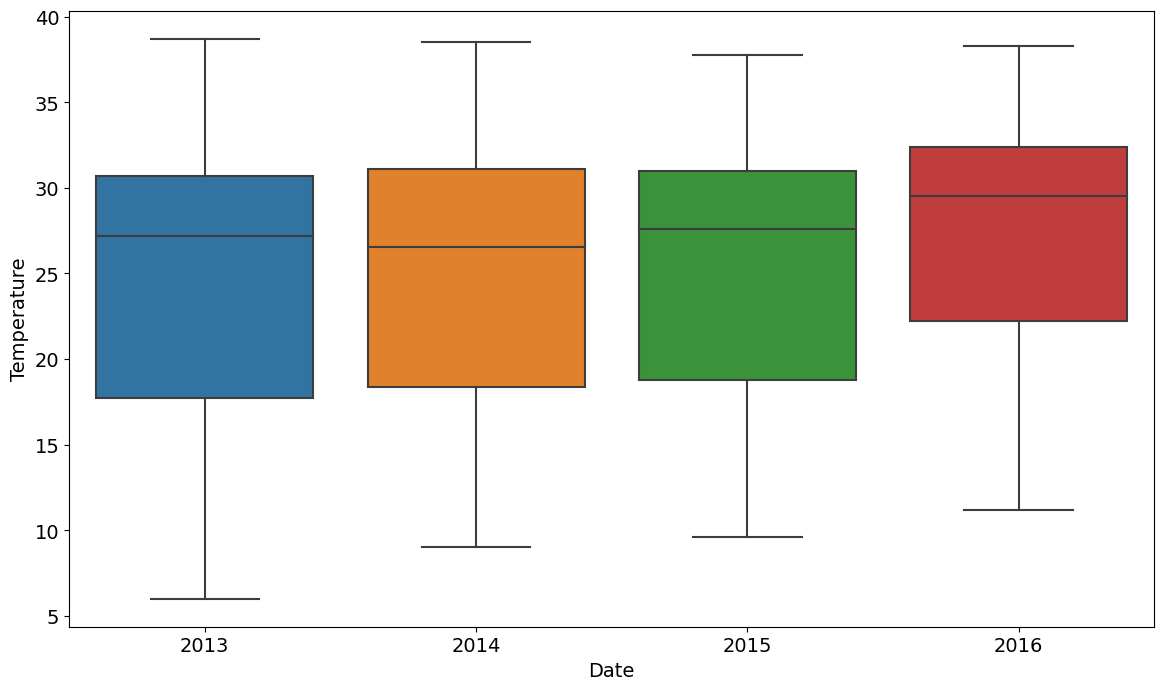

In [ ]:
plt.figure(figsize=(14, 8))
sns.boxplot(x=dates.dt.year.iloc[:-1], y='meantemp', data=df.iloc[:-1])
plt.xlabel("Date", fontsize=14)
plt.ylabel("Temperature", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

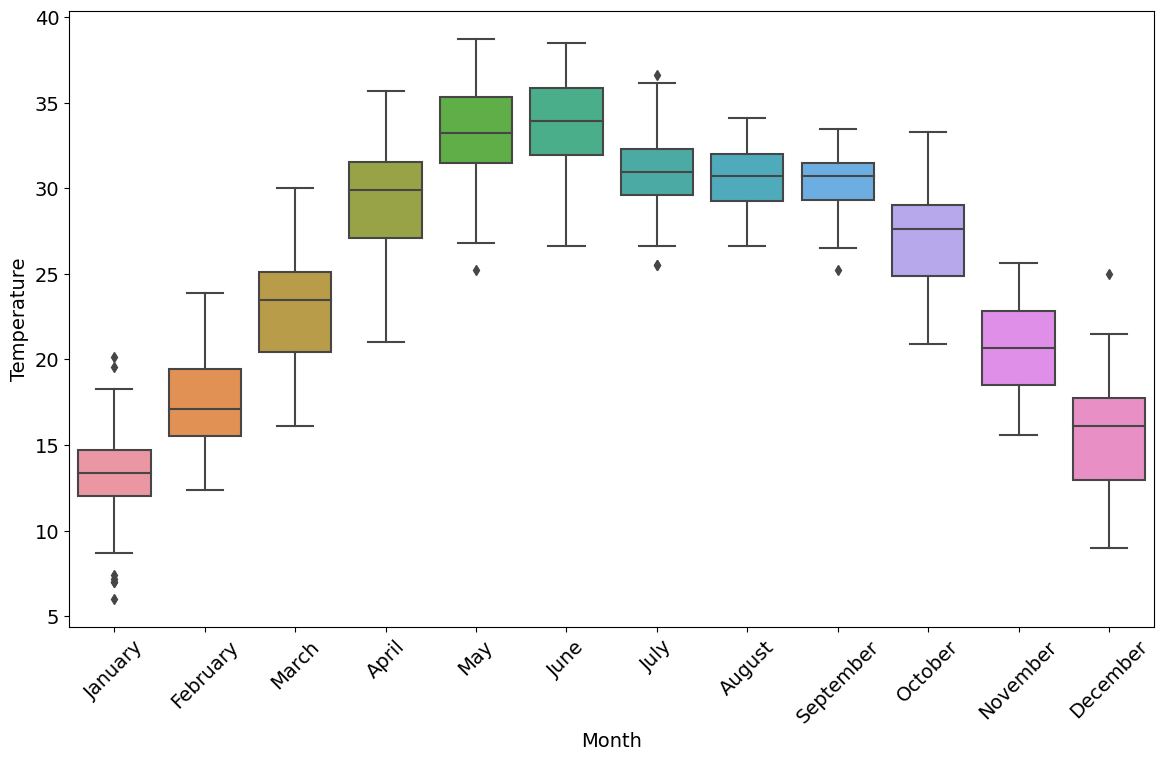

In [ ]:
plt.figure(figsize=(14, 8))
sns.boxplot(x=dates.dt.month.iloc[:-1], y='meantemp', data=df.iloc[:-1])
plt.xlabel("Month", fontsize=14)
plt.ylabel("Temperature", fontsize=14)
plt.xticks(np.arange(0, 12), labels=dates.dt.month_name().unique(), rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.show()

###Time series Decomposition


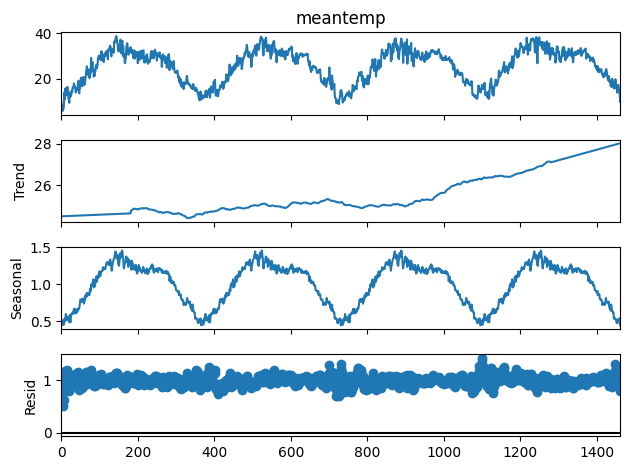

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Multiplicative Decomposition
decomp_mul = seasonal_decompose(df['meantemp'], model='multiplicative', extrapolate_trend='freq', period=365)
decomp_mul.plot()
plt.show()

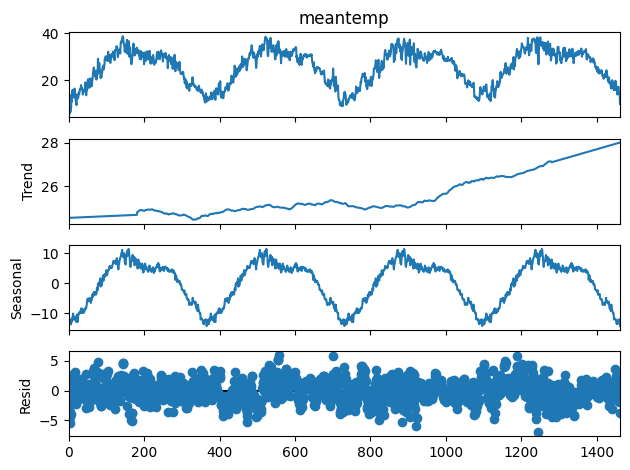

In [ ]:
# Additive Decomposition
decomp_add = seasonal_decompose(df['meantemp'], model='additive', extrapolate_trend='freq', period=365)
decomp_add.plot()
plt.show()

#### Test for stationarity and trend stationarity

In [ ]:
from statsmodels.tsa.stattools import adfuller, kpss

# Augmented Dickey Fuller (ADF) Test
result = adfuller(df['meantemp'].values, autolag='AIC')
print('ADF Statistic:', result[0], 'p-value:', result[1])

# Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test
result = kpss(df['meantemp'].values, nlags="auto", regression='c')
print('KPSS Statistic: ', result[0], 'p-value: ', result[1])

ADF Statistic: -2.0210690559206737 p-value: 0.2774121372301601
KPSS Statistic:  0.18786352260533618 p-value:  0.1


<ipython-input-33-e3b163fc56a9>:8: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(df['meantemp'].values, nlags="auto", regression='c')


####Detrending a time-series


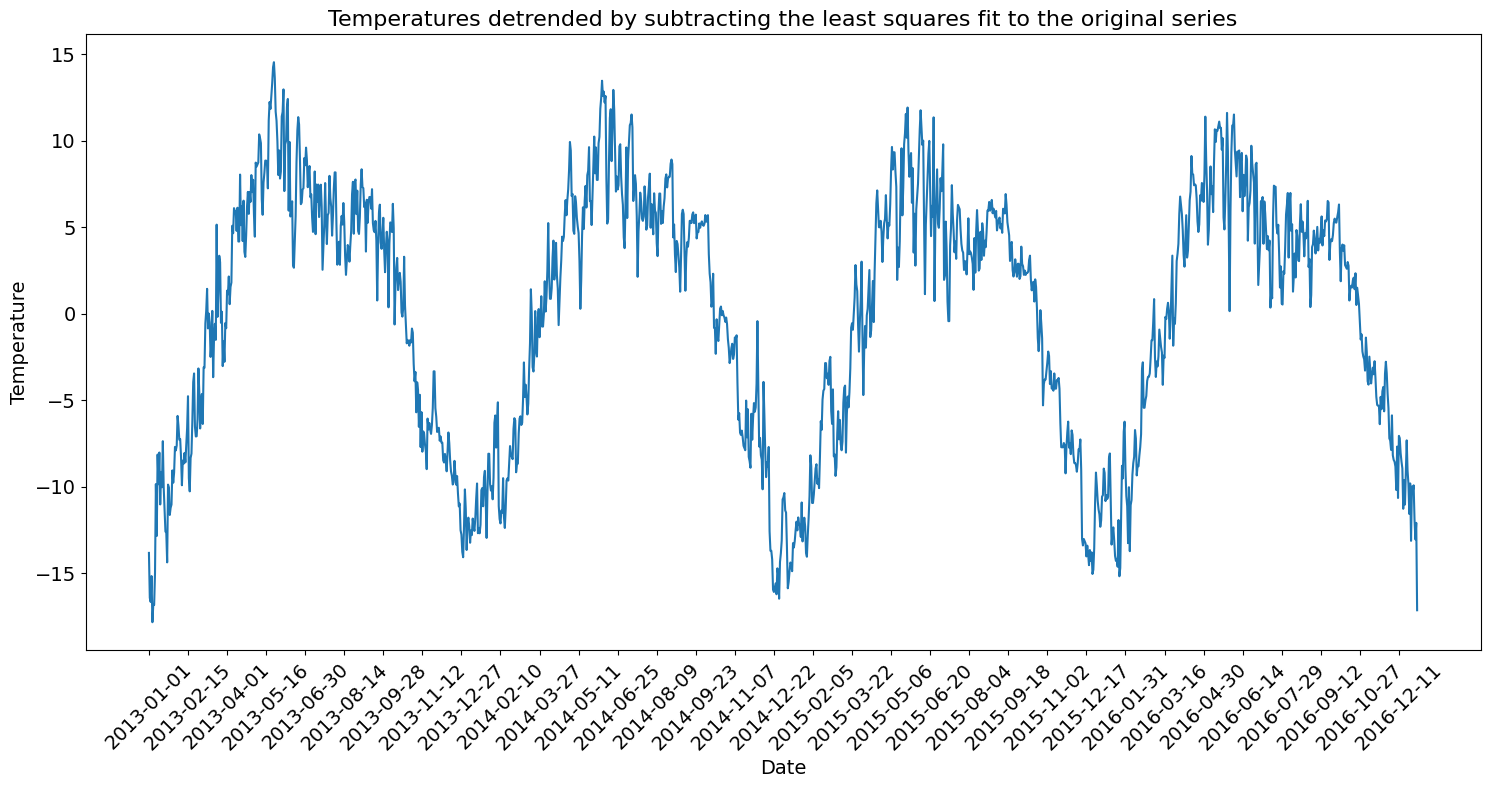

In [ ]:
from scipy import signal

plt.figure(figsize=(18, 8))
detrended = signal.detrend(df['meantemp'].values)
plt.plot(df.date, detrended)
plt.title('Temperatures detrended by subtracting the least squares fit to the original series', fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Temperature", fontsize=14)
plt.xticks(np.arange(0, len(df.date)+1, 45), rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.show()

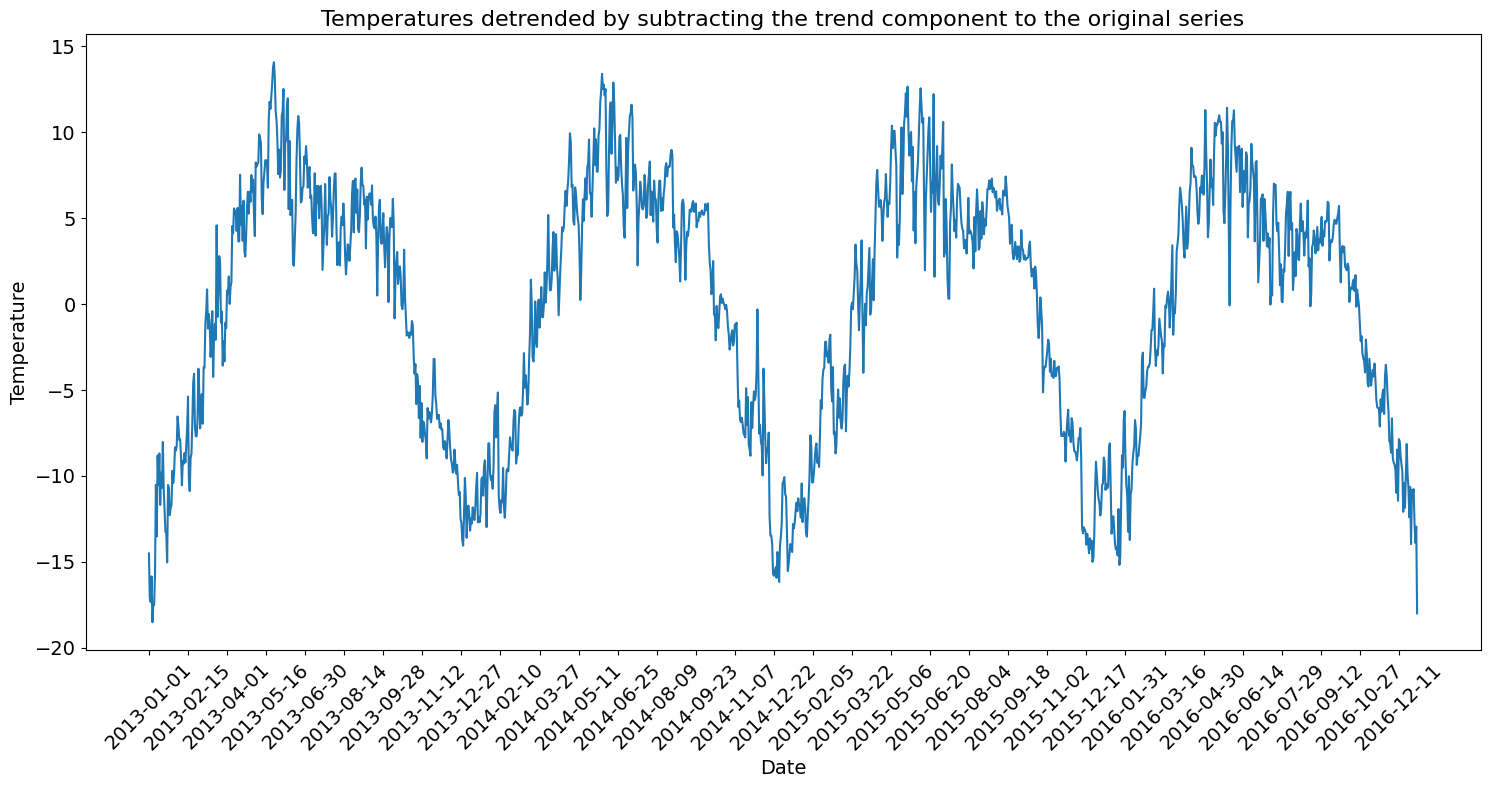

In [ ]:
plt.figure(figsize=(18, 8))
decomp_mul = seasonal_decompose(df['meantemp'], model='multiplicative', extrapolate_trend='freq', period=365)
detrended = df['meantemp'].values - decomp_mul.trend
plt.plot(df.date, detrended)
plt.title('Temperatures detrended by subtracting the trend component to the original series', fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Temperature", fontsize=14)
plt.xticks(np.arange(0, len(df.date)+1, 45), rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.show()

####Deseasonalizing a time series

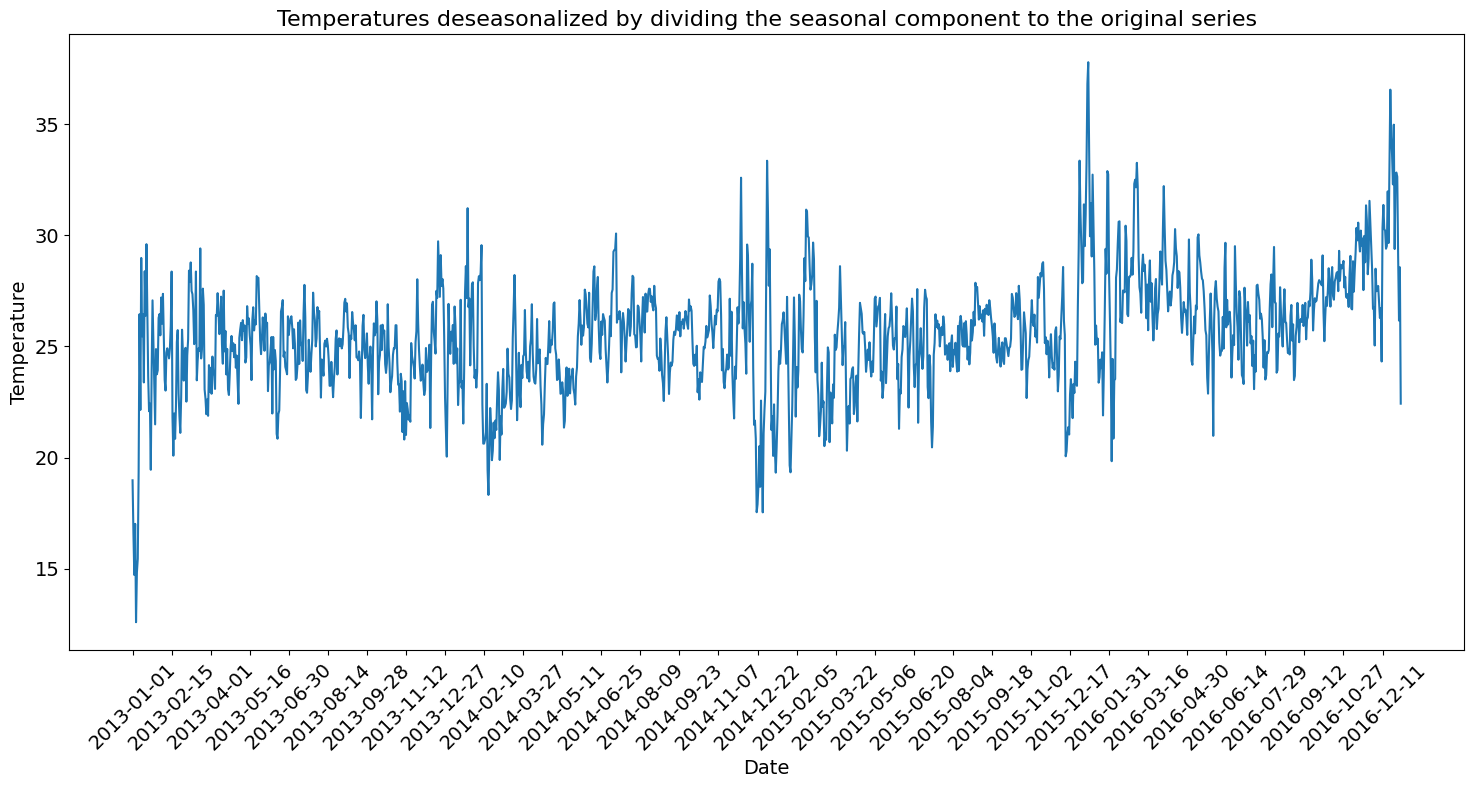

In [ ]:
plt.figure(figsize=(18, 8))
deseasonalized = df['meantemp'].values / decomp_mul.seasonal
plt.plot(df.date, deseasonalized)
plt.title('Temperatures deseasonalized by dividing the seasonal component to the original series', fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Temperature", fontsize=14)
plt.xticks(np.arange(0, len(df.date)+1, 45), rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.show()

####Testing for time-series seasonality

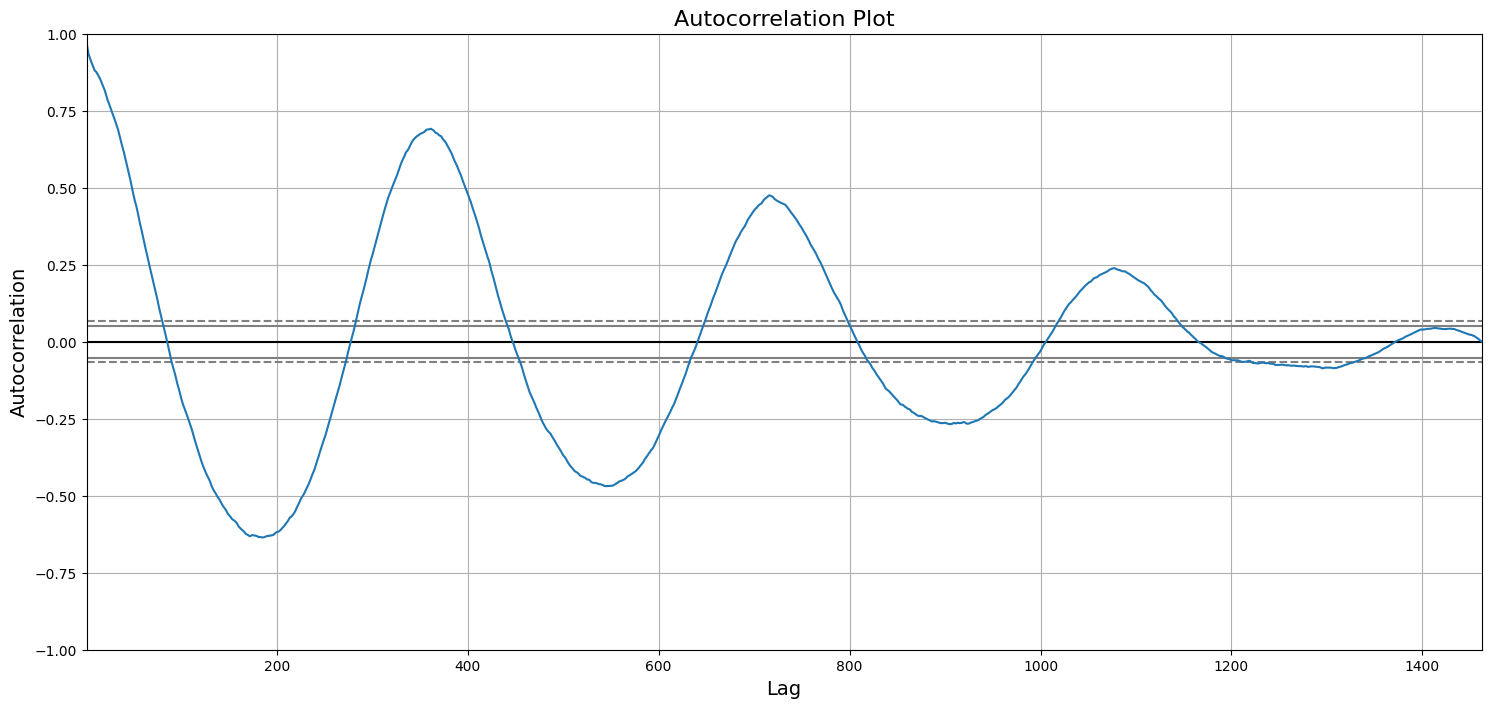

In [ ]:
from pandas.plotting import autocorrelation_plot

plt.figure(figsize=(18, 8))
autocorrelation_plot(df['meantemp'])
plt.title('Autocorrelation Plot', fontsize=16)
plt.xlabel("Lag", fontsize=14)
plt.ylabel("Autocorrelation", fontsize=14)
plt.show()

####Autocorrelation and Partial-autocorrelation

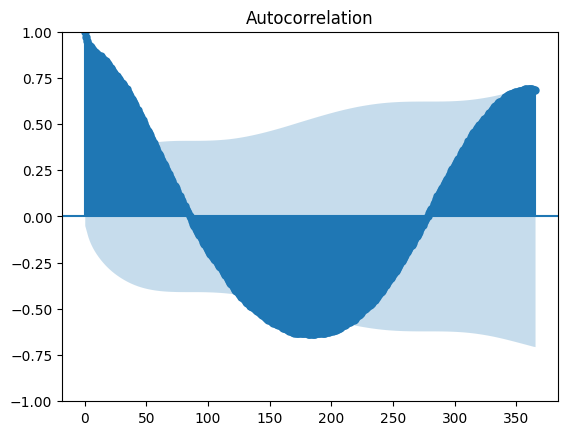

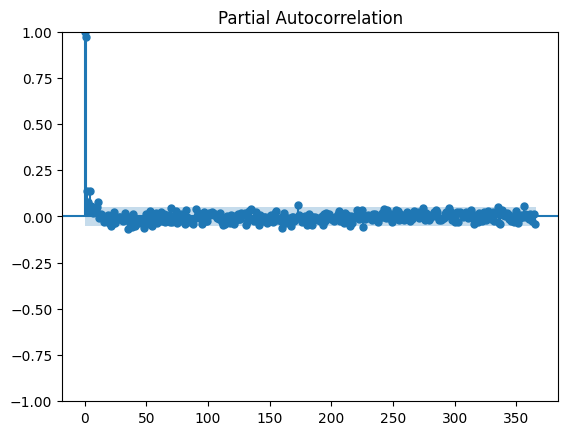

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df['meantemp'], lags=365)
plt.show()
plot_pacf(df['meantemp'], lags=365)
plt.show()

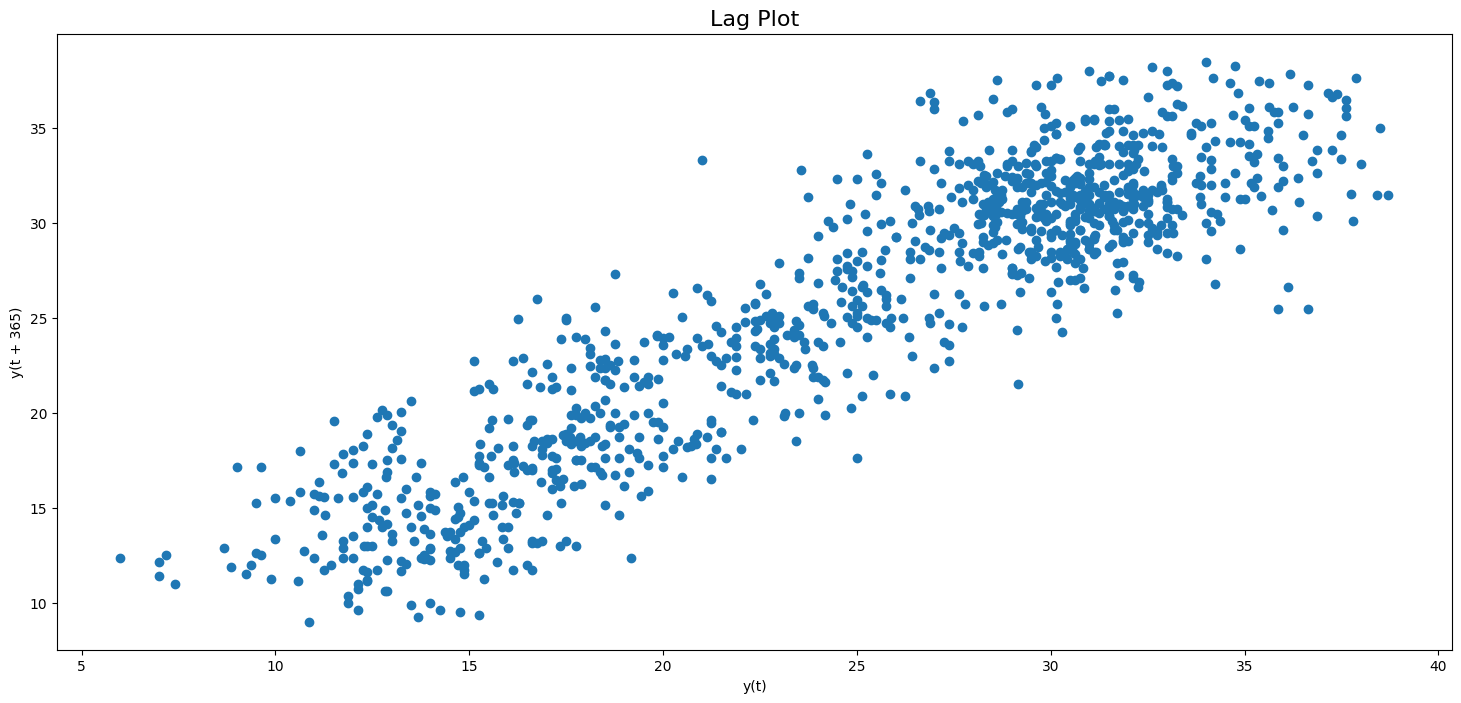

In [ ]:
#Lag plot

from pandas.plotting import lag_plot

plt.figure(figsize=(18, 8))
lag_plot(df['meantemp'], lag=365)
plt.title('Lag Plot', fontsize=16)
plt.show()

####Smoothing a time-series

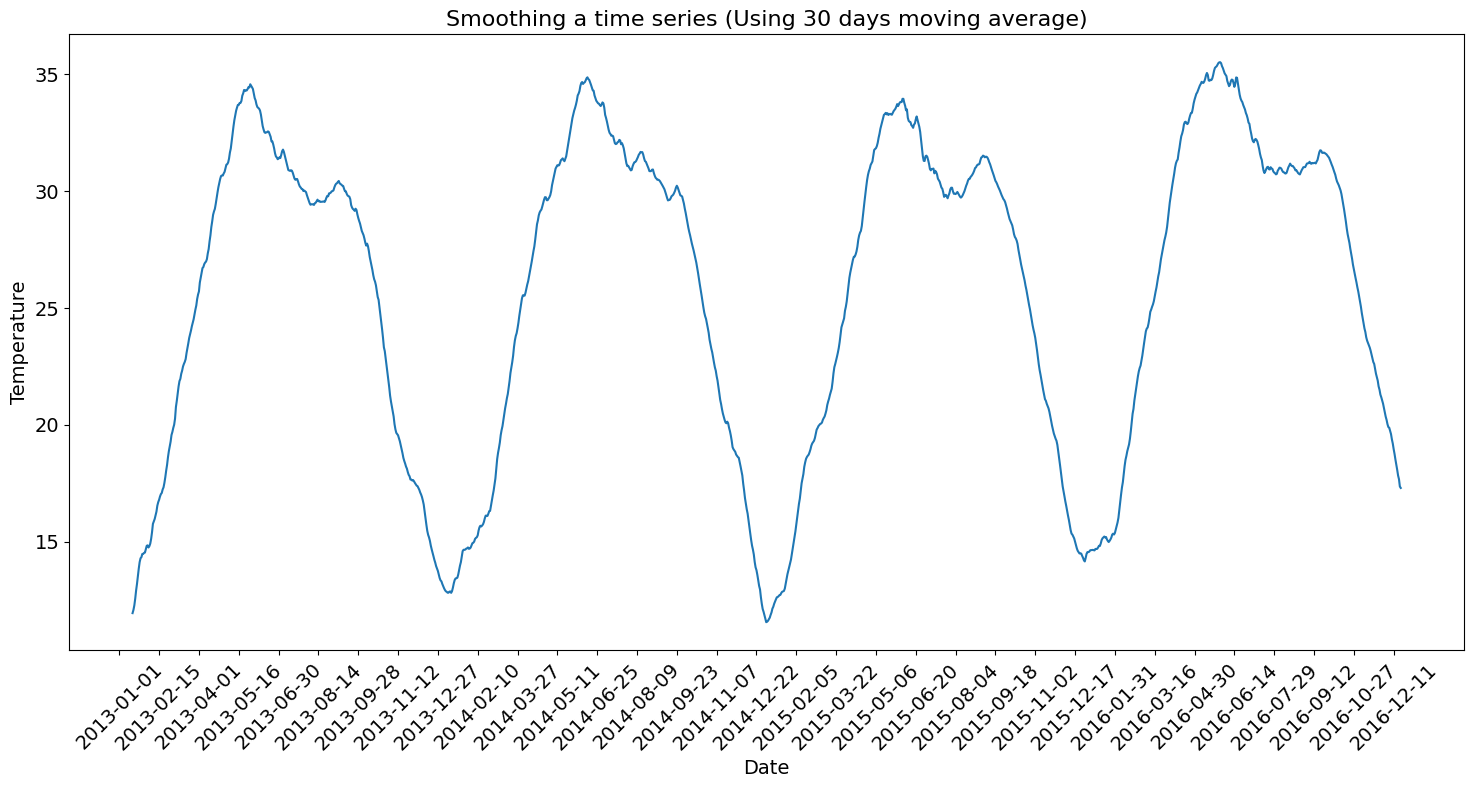

In [ ]:
plt.figure(figsize=(18, 8))
df_ma = df['meantemp'].rolling(30, center=True, closed='both').mean()
plt.plot(df.date, df_ma)
plt.title('Smoothing a time series (Using 30 days moving average)', fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Temperature", fontsize=14)
plt.xticks(np.arange(0, len(df.date)+1, 45), rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [ ]:
from statsmodels.nonparametric.smoothers_lowess import lowess

# LOWESS smoothing (Locally Weighted Regression)
df_loess = pd.DataFrame(lowess(df['meantemp'], np.arange(len(df['meantemp'])), frac=0.10)[:, 1], index=df.date, columns=['meantemp'])
df_loess.head()

,meantemp
date,
2013-01-01,9.021920
2013-01-02,9.206480
2013-01-03,9.391054
2013-01-04,9.575645
2013-01-05,9.760254


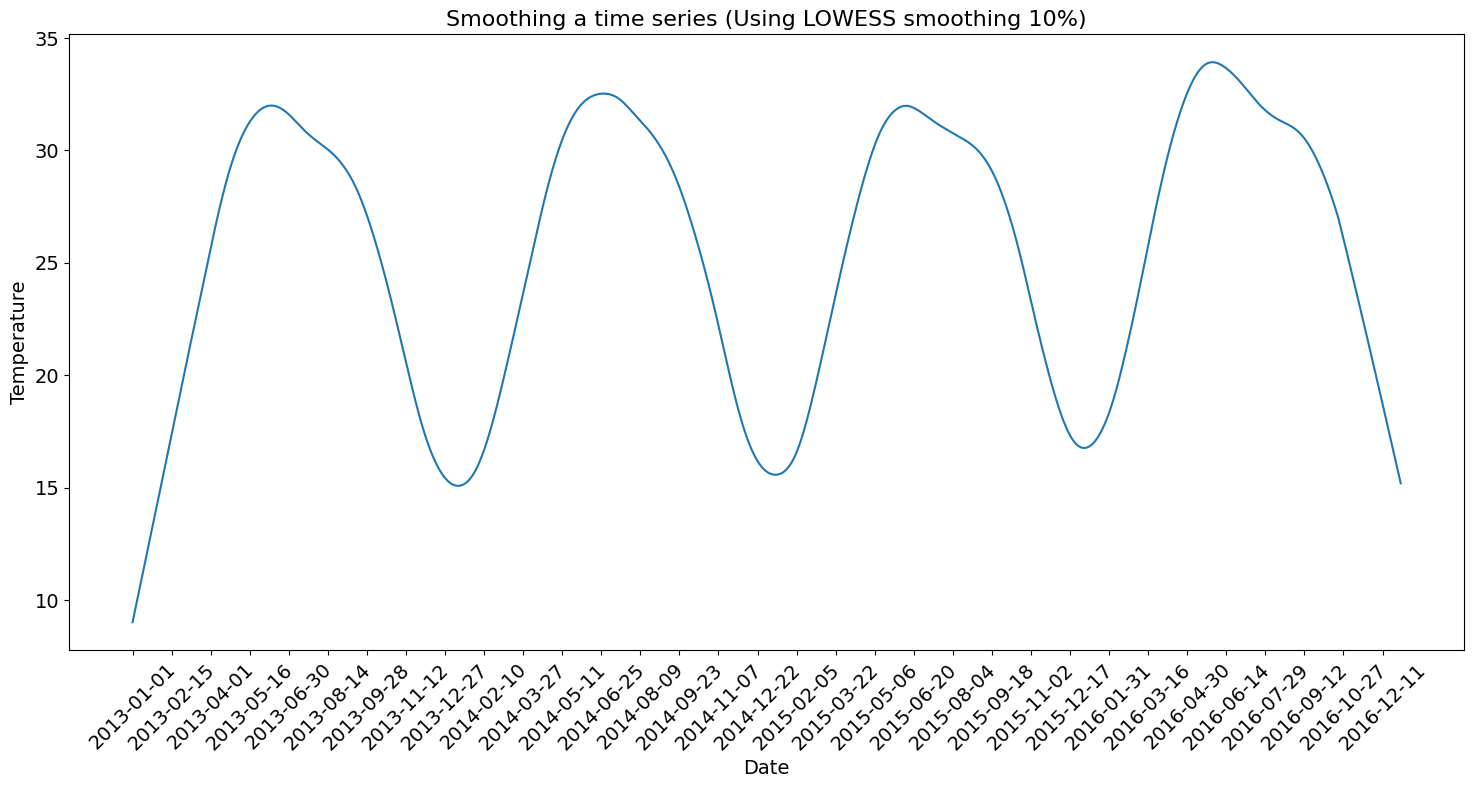

In [ ]:
plt.figure(figsize=(18, 8))
plt.plot(df_loess.index, df_loess['meantemp'])
plt.title('Smoothing a time series (Using LOWESS smoothing 10%)', fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Temperature", fontsize=14)
plt.xticks(np.arange(0, len(df.date)+1, 45), rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.show()

###Granger Causality test

Understanding if one time series will be useful to forecast another.

In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests

grangercausalitytests(df[['meantemp', 'humidity']], maxlag=2)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=8.3483  , p=0.0039  , df_denom=1458, df_num=1
ssr based chi2 test:   chi2=8.3655  , p=0.0038  , df=1
likelihood ratio test: chi2=8.3416  , p=0.0039  , df=1
parameter F test:         F=8.3483  , p=0.0039  , df_denom=1458, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.7585  , p=0.0637  , df_denom=1455, df_num=2
ssr based chi2 test:   chi2=5.5360  , p=0.0628  , df=2
likelihood ratio test: chi2=5.5255  , p=0.0631  , df=2
parameter F test:         F=2.7585  , p=0.0637  , df_denom=1455, df_num=2


{1: ({'ssr_ftest': (8.348287242759334, 0.003917586510546236, 1458.0, 1),
   'ssr_chi2test': (8.365464788526328, 0.0038241879867707707, 1),
   'lrtest': (8.341606126880833, 0.003874732859744176, 1),
   'params_ftest': (8.348287242759076, 0.003917586510546435, 1458.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (2.7585146949624835, 0.06371737139415601, 1455.0, 2),
   'ssr_chi2test': (5.535988253807871, 0.06278782291707086, 2),
   'lrtest': (5.5255191051082875, 0.06311735216461932, 2),
   'params_ftest': (2.7585146949627695, 0.06371737139413886, 1455.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])])}

In [ ]:
#ARIMA (Auto Regressive Integrated Moving Average)
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df['meantemp'], order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:               meantemp   No. Observations:                 1462
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2768.239
Date:                Wed, 06 Dec 2023   AIC                           5542.478
Time:                        09:32:10   BIC                           5558.339
Sample:                             0   HQIC                          5548.395
                               - 1462                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5728      0.046     12.494      0.000       0.483       0.663
ma.L1         -0.8028      0.036    -22.070      0.000      -0.874      -0.731
sigma2         2.5896      0.072     36.204      0.0

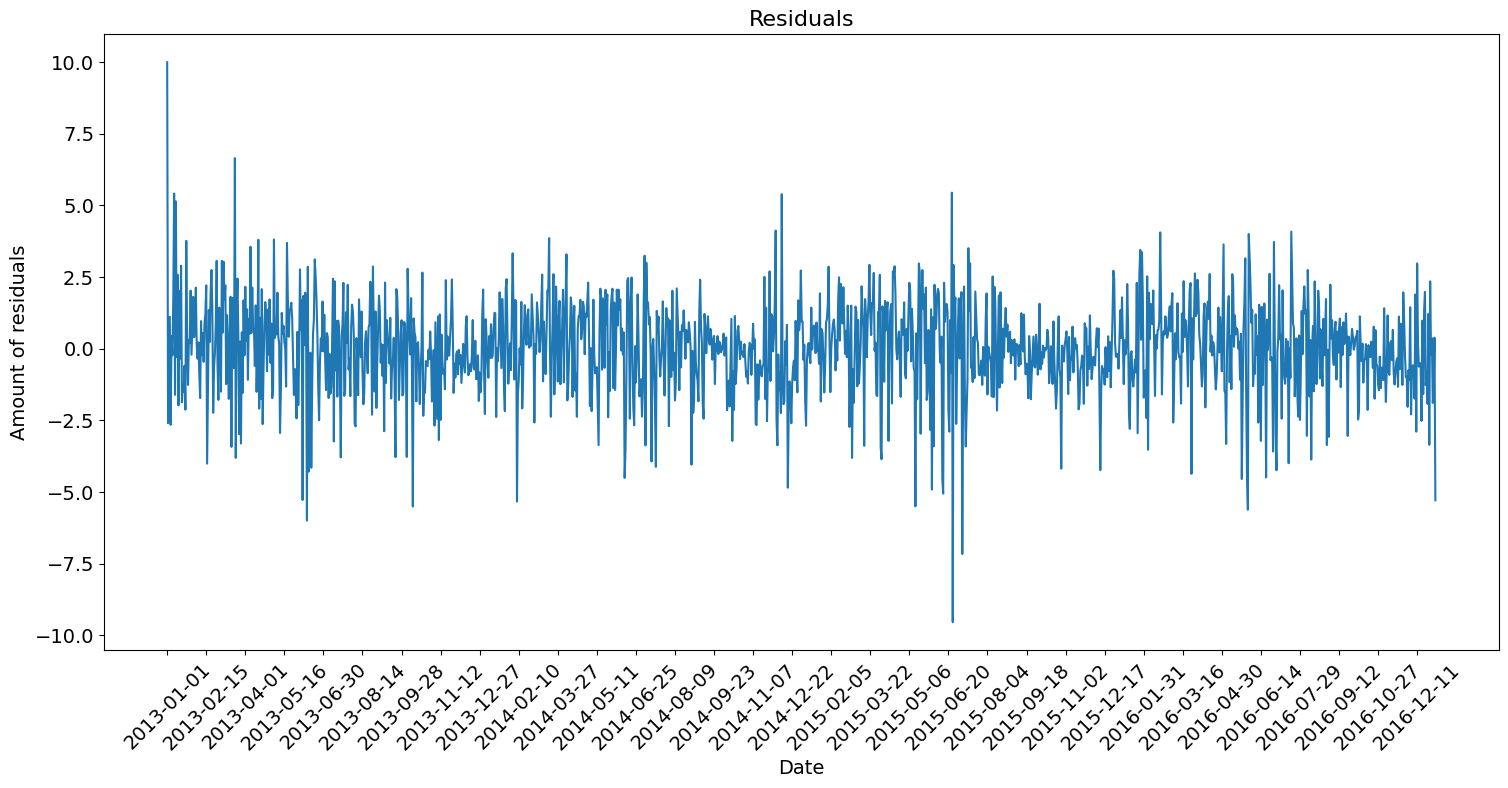

In [ ]:
# Plotting residual errors
residuals = pd.DataFrame(model_fit.resid)
plt.figure(figsize=(18, 8))
plt.plot(residuals)
plt.title('Residuals', fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Amount of residuals", fontsize=14)
plt.xticks(np.arange(0, len(df.date)+1, 45), labels=[df.date[i] for i in range(0, len(df.date)+1, 45)], rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.show()

<Figure size 1800x800 with 0 Axes>

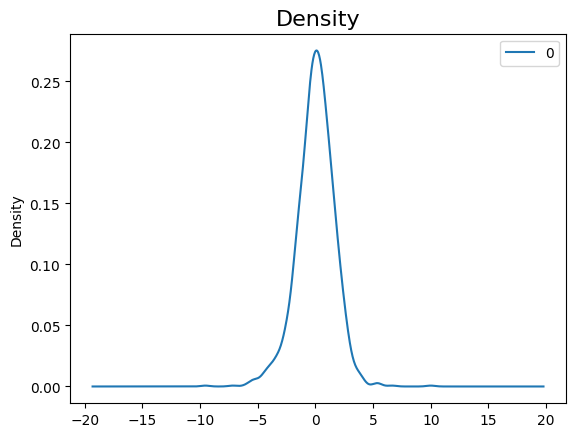

In [ ]:
plt.figure(figsize=(18, 8))
residuals.plot(kind='kde', title='Density')
plt.title('Density', fontsize=16)
plt.show()

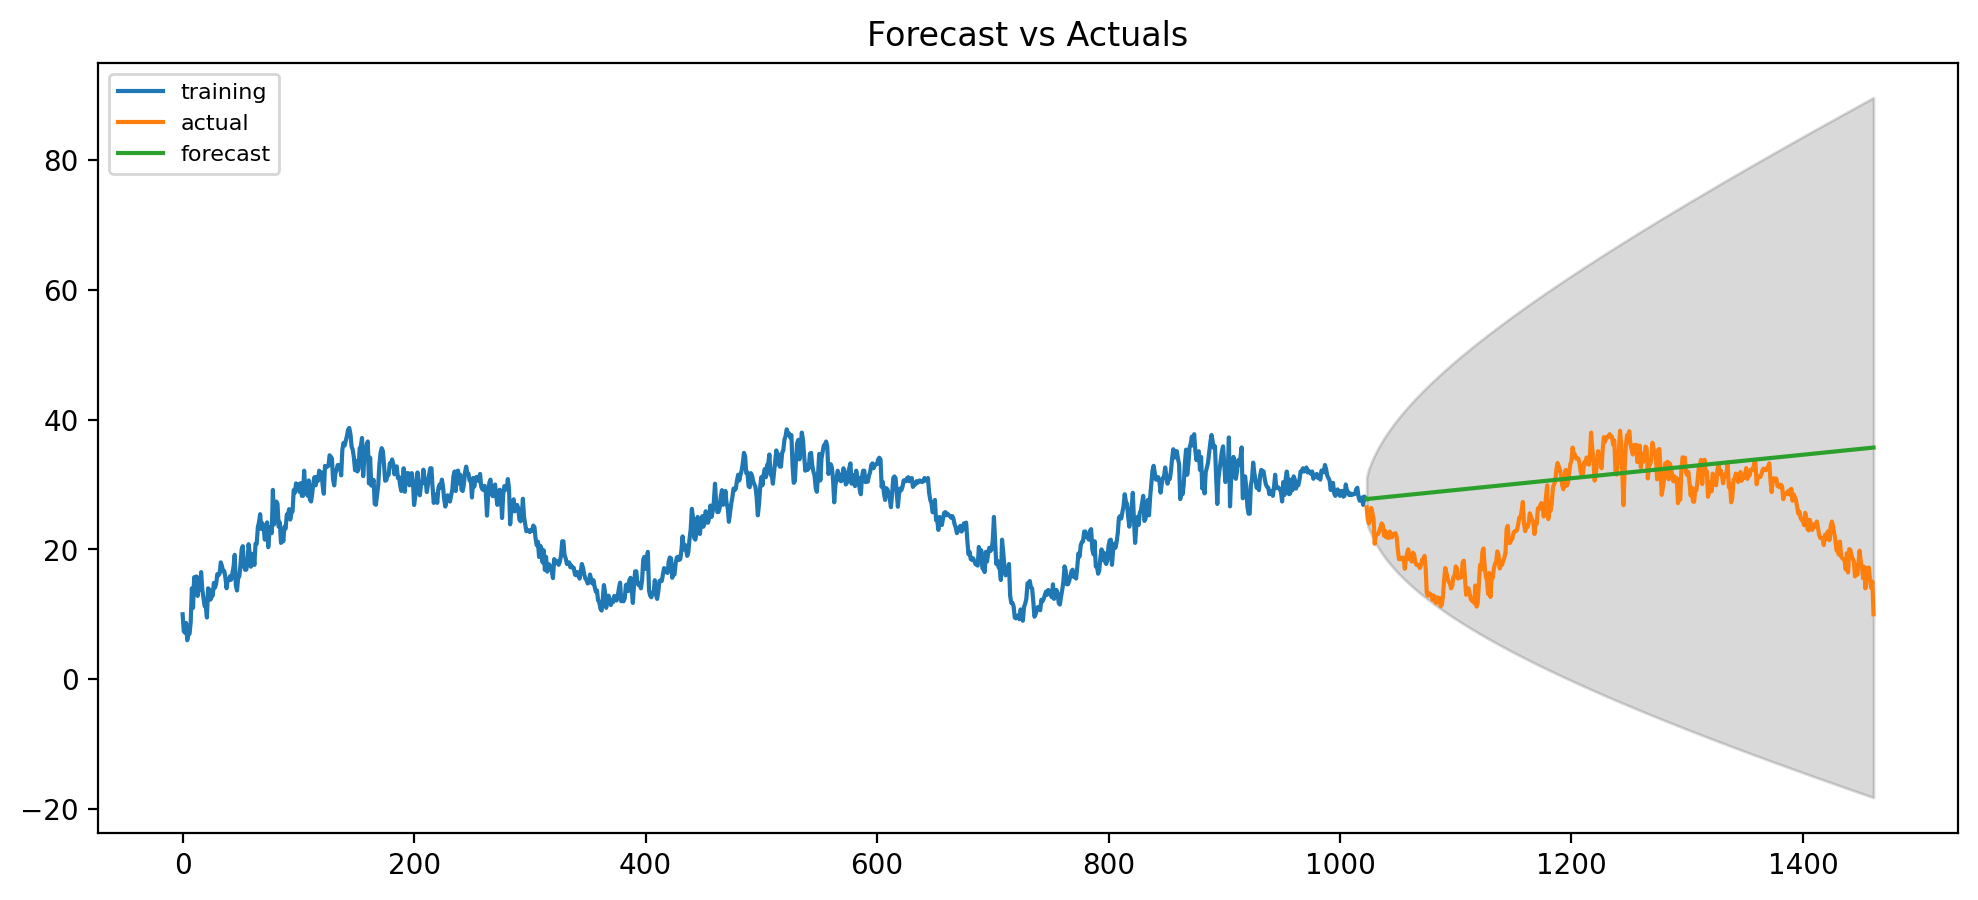

In [ ]:
train = df['meantemp'][:int(np.floor((len(df)/100)*70))]
test = df['meantemp'][int(np.floor((len(df)/100)*70)):]

model = ARIMA(train, order=(3, 2, 1))
fitted = model.fit()

fc = fitted.get_forecast(len(df['meantemp'][int(np.floor((len(df)/100)*70)):]))
conf = fc.conf_int(alpha=0.05) # 95% confidence

fc_series = pd.Series(fc.predicted_mean, index=test.index)
lower_series = pd.Series(conf.iloc[:, 0], index=test.index)
upper_series = pd.Series(conf.iloc[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=200)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series,
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()


###**License:**

Copyright (c) 2023 Amrutha Sai Edara


Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:


The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.


THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE





###**References:**

https://www.statisticshowto.com/probability-and-statistics/hypothesis-testing/f-test/

https://towardsdatascience.com/causal-discovery-6858f9af6dcb

https://medium.com/@hosamedwee/causal-inference-1-the-essence-of-causality-d684f7885000

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1239917/#:~:text=In%20the%20counterfactual%20model%2C%20a,multiple%20causal%20factors%20are%20allowed.